<a href="https://colab.research.google.com/github/SaraElizabethGarciaCajero/Proyecto-ASE-I/blob/main/Educaci%C3%B3nFemenina_ASE1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Importo librerías
import pandas as pd
import numpy as np
import io
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
%matplotlib inline     
sns.set(color_codes=True)
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters.model import ExponentialSmoothing

In [ ]:
#Subo archivo que ocuparé
from google.colab import files #Sirve para cargar archivos desde el disco duro a google colab
uploaded = files.upload()

Saving Educacion_05 (2).xlsx to Educacion_05 (2).xlsx


In [ ]:
#Leemos el archivo y lo guardamos en el dataFrame llamado df_Edu
df_Edu=pd.read_excel("Educacion_05 (2).xlsx", header=0)
df_Edu

,Entidad federativa,2010,2015,2020
0,Entidad federativa,Mujeres,Mujeres,Mujeres
1,Estados Unidos Mexicanos,8.48,9.01,9.64
2,Aguascalientes,9.17,9.64,10.32
3,Baja California,9.2,9.68,10.18
4,Baja California Sur,9.42,9.89,10.4
5,Campeche,8.32,8.94,9.52
6,Coahuila de Zaragoza,9.37,9.78,10.36
7,Colima,8.95,9.52,10.1
8,Chiapas,6.28,6.92,7.5
9,Chihuahua,8.83,9.45,10.02


In [ ]:
#Elimino datos NaN
df_Edu.drop(df_Edu.index[34:49], inplace=True)
df_Edu

,Entidad federativa,2010,2015,2020
0,Entidad federativa,Mujeres,Mujeres,Mujeres
1,Estados Unidos Mexicanos,8.48,9.01,9.64
2,Aguascalientes,9.17,9.64,10.32
3,Baja California,9.2,9.68,10.18
4,Baja California Sur,9.42,9.89,10.4
5,Campeche,8.32,8.94,9.52
6,Coahuila de Zaragoza,9.37,9.78,10.36
7,Colima,8.95,9.52,10.1
8,Chiapas,6.28,6.92,7.5
9,Chihuahua,8.83,9.45,10.02


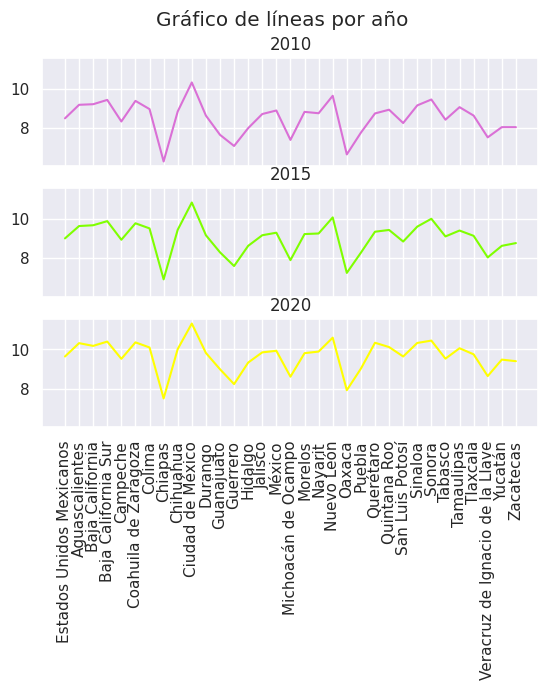

In [ ]:
import matplotlib.pyplot as plt

# Seleccionamos los datos de interés
datos_2010 = df_Edu.iloc[1:, 1].astype(float)
datos_2015 = df_Edu.iloc[1:, 2].astype(float)
datos_2020 = df_Edu.iloc[1:, 3].astype(float)
entidades = df_Edu.iloc[1:, 0]

# Creamos la figura y los ejes
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, sharex=True, sharey=True)

# Graficamos cada año en su respectivo eje
ax1.plot(entidades, datos_2010, color = "orchid")
ax1.set_title('2010')
ax2.plot(entidades, datos_2015, color = "chartreuse")
ax2.set_title('2015')
ax3.plot(entidades, datos_2020, color = "yellow")
ax3.set_title('2020')

# Configuramos los ejes
fig.suptitle('Gráfico de líneas por año')
plt.xticks(rotation=90)

# Mostramos el gráfico
plt.show()


In [ ]:
#Correlación entre el estado con más embarazos y su relación con: pobreza, pobreza extrema y educación 
#Estado: Chihuahua
#Subo archivo que ocuparé
from google.colab import files #Sirve para cargar archivos desde el disco duro a google colab
uploaded = files.upload()

Saving Agrupamiento_Chihuahua.xlsx to Agrupamiento_Chihuahua.xlsx


In [ ]:
#Leemos el archivo y lo guardamos en el dataFrame llamado df_Edu
df_Corr=pd.read_excel("Agrupamiento_Chihuahua.xlsx", header=0)
df_Corr

,Estado,Año,Embarazo,Pobreza,Pobreza Extrema,Educación
0,Chihuahua,2010,18.8,28.544146,6.560855,8.48
1,Chihuahua,2015,18.2,27.486100,4.600000,9.01
2,Chihuahua,2020,15.1,32.604471,2.900000,9.64


In [ ]:
Chihuahua_Corr=Grafica1

In [ ]:
Frames=[Chihuahua_Corr, Grafica1]
Chihuahua_Correlacion=pd.concat(Frames)

In [ ]:
df_Corr=df_Corr.drop(['Estado'], axis=1)

In [ ]:
df_Corr.corr()

,Año,Embarazo,Pobreza,Pobreza Extrema,Educación
Año,1.000000,-0.931623,0.751367,-0.999155,0.998764
Embarazo,-0.931623,1.000000,-0.939811,0.915897,-0.948537
Pobreza,0.751367,-0.939811,1.000000,-0.723608,0.783241
Pobreza Extrema,-0.999155,0.915897,-0.723608,1.000000,-0.995876
Educación,0.998764,-0.948537,0.783241,-0.995876,1.000000


<Axes: >

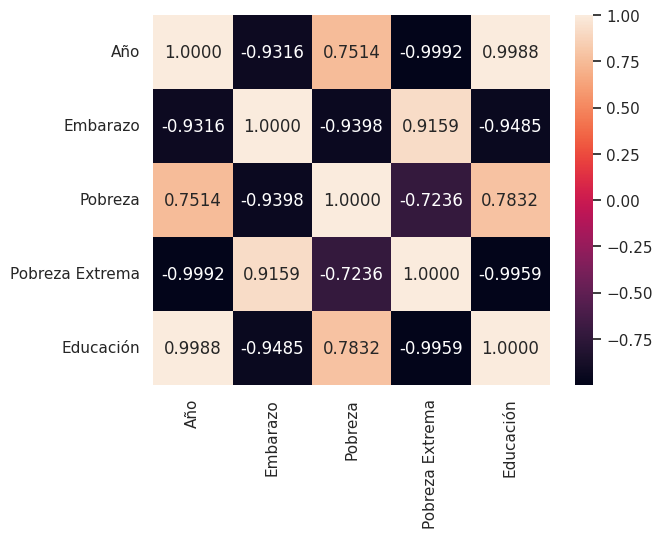

In [ ]:
sns.heatmap(df_Corr.corr(), annot=True, fmt='.4f')

In [30]:
#Correlación entre el estado con más embarazos y su relación con: pobreza, pobreza extrema y educación 
#Estado: Coahuila de Zaragoza
#Subo archivo que ocuparé
from google.colab import files #Sirve para cargar archivos desde el disco duro a google colab
uploaded = files.upload()

Saving Agrupamiento_CoahuiladeZaragoza.xlsx to Agrupamiento_CoahuiladeZaragoza.xlsx


In [31]:
df_Corr2=pd.read_excel("Agrupamiento_CoahuiladeZaragoza.xlsx", header=0)
df_Corr2

,Estado,Año,Embarazo,Pobreza,Pobreza Extrema,Educación
0,Coahuila de Zaragoza,2010,21.8,34.692844,2.900000,9.37
1,Coahuila de Zaragoza,2015,22.0,33.439467,2.830977,9.78
2,Coahuila de Zaragoza,2020,17.2,26.693527,2.554371,10.36


In [37]:
Coahuila_Corr=Grafica1

In [46]:
Frames=[Coahuila_Corr, Grafica1]
Coahuila_Correlacion=pd.concat(Frames)

In [47]:
df_Corr2.corr()

<ipython-input-47-23c061a9dbc8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_Corr2.corr()


,Año,Embarazo,Pobreza,Pobreza Extrema,Educación
Año,1.000000,-0.847024,-0.929618,-0.944810,0.995121
Embarazo,-0.847024,1.000000,0.983300,0.974424,-0.895334
Pobreza,-0.929618,0.983300,1.000000,0.999048,-0.961441
Pobreza Extrema,-0.944810,0.974424,0.999048,1.000000,-0.972523
Educación,0.995121,-0.895334,-0.961441,-0.972523,1.000000


<ipython-input-48-986965a077f0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_Corr2.corr(), annot=True, fmt='.4f')


<Axes: >

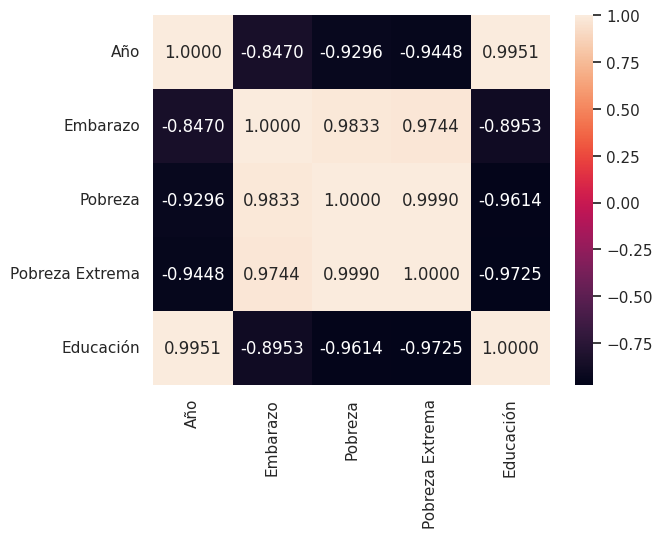

In [48]:
sns.heatmap(df_Corr2.corr(), annot=True, fmt='.4f')

In [43]:
#Correlación entre el estado con más embarazos y su relación con: pobreza, pobreza extrema y educación 
#Estado: Guerrero
#Subo archivo que ocuparé
from google.colab import files #Sirve para cargar archivos desde el disco duro a google colab
uploaded = files.upload()

Saving Agrupamiento_Guerreo.xlsx to Agrupamiento_Guerreo.xlsx


In [44]:
df_Corr3=pd.read_excel("Agrupamiento_Guerreo.xlsx", header=0)
df_Corr3

,Estado,Año,Embarazo,Pobreza,Pobreza Extrema,Educación
0,Guerrero,2010,19.6,54.668455,31.80,7.07
1,Guerrero,2015,20.4,55.602899,23.85,7.60
2,Guerrero,2020,18.2,50.750793,25.50,8.23


In [45]:
Guerrero_Corr=Grafica1

In [49]:
Frames=[Guerrero_Corr, Grafica1]
Guerreo_Correlacion=pd.concat(Frames)

In [50]:
df_Corr3.corr()

<ipython-input-50-2c9de105a1d7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_Corr3.corr()


,Año,Embarazo,Pobreza,Pobreza Extrema,Educación
Año,1.000000,-0.628619,-0.760898,-0.750798,0.998764
Embarazo,-0.628619,1.000000,0.982951,-0.041738,-0.666502
Pobreza,-0.760898,0.982951,1.000000,0.142681,-0.792213
Pobreza Extrema,-0.750798,-0.041738,0.142681,1.000000,-0.717035
Educación,0.998764,-0.666502,-0.792213,-0.717035,1.000000


<ipython-input-51-00c2efbe7716>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_Corr3.corr(), annot=True, fmt='.4f')


<Axes: >

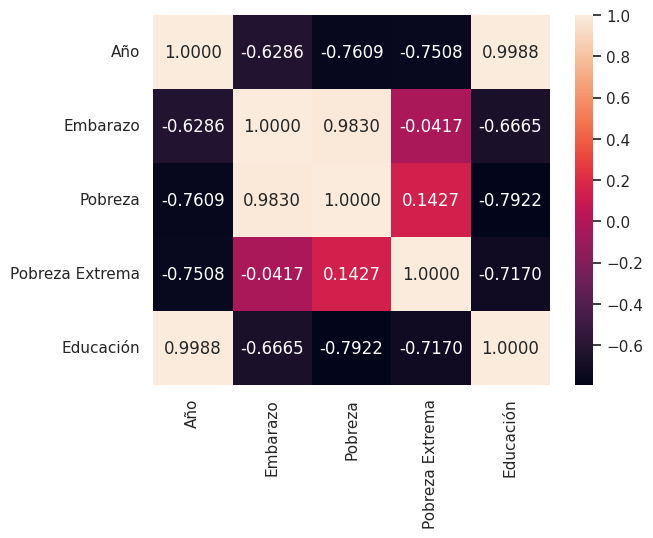

In [51]:
sns.heatmap(df_Corr3.corr(), annot=True, fmt='.4f')